## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.1, 0.5]
redice_lr_patient = [5, 10]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.10, reduce_patient: 5




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 

50000/50000 [==============================] - 11s 225us/step - loss: 1.7914 - acc: 0.3687 - val_loss: 1.7393 - val_acc: 0.3882
Epoch 3/25
50000/50000 [==============================] - 12s 245us/step - loss: 1.6729 - acc: 0.4120 - val_loss: 1.6685 - val_acc: 0.4108
Epoch 4/25
50000/50000 [==============================] - 12s 245us/step - loss: 1.6011 - acc: 0.4395 - val_loss: 1.6221 - val_acc: 0.4265
Epoch 5/25
50000/50000 [==============================] - 13s 252us/step - loss: 1.5474 - acc: 0.4592 - val_loss: 1.5891 - val_acc: 0.4408
Epoch 6/25
50000/50000 [==============================] - 13s 258us/step - loss: 1.5033 - acc: 0.4763 - val_loss: 1.5625 - val_acc: 0.4465
Epoch 7/25
50000/50000 [==============================] - 12s 250us/step - loss: 1.4651 - acc: 0.4895 - val_loss: 1.5416 - val_acc: 0.4529
Epoch 8/25
50000/50000 [==============================] - 14s 271us/step - loss: 1.4318 - acc: 0.5032 - val_loss: 1.5226 - val_acc: 0.4611
Epoch 9/25
50000/50000 [==============

Epoch 25/25
50000/50000 [==============================] - 11s 222us/step - loss: 1.0797 - acc: 0.6329 - val_loss: 1.4053 - val_acc: 0.5046
Numbers of exp: 3, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_nor

50000/50000 [==============================] - 11s 214us/step - loss: 0.5658 - acc: 0.8264 - val_loss: 1.3484 - val_acc: 0.5523
Epoch 12/25
50000/50000 [==============================] - 11s 215us/step - loss: 0.5424 - acc: 0.8343 - val_loss: 1.3628 - val_acc: 0.5510
Epoch 13/25
50000/50000 [==============================] - 11s 215us/step - loss: 0.5230 - acc: 0.8434 - val_loss: 1.3738 - val_acc: 0.5529
Epoch 14/25
50000/50000 [==============================] - 11s 213us/step - loss: 0.5069 - acc: 0.8474 - val_loss: 1.3895 - val_acc: 0.5484
Epoch 15/25
50000/50000 [==============================] - 11s 214us/step - loss: 0.4916 - acc: 0.8541 - val_loss: 1.4028 - val_acc: 0.5487

Epoch 00015: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 16/25
50000/50000 [==============================] - 11s 214us/step - loss: 0.4678 - acc: 0.8652 - val_loss: 1.4032 - val_acc: 0.5521
Epoch 17/25
50000/50000 [==============================] - 11s 217us/step - loss: 0.4631 -

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 14s 279us/step - loss: 2.7943 - acc: 0.0875 - val_loss: 2.7918 - val_acc: 0.0884
Epoch 2/25
50000/50000 [==============================] - 11s 215us/step - loss: 2.7656 - acc: 0.0924 - val_loss: 2.7687 - val_acc: 0.0922
Epoch 3/25
50000/50000 [==============================] - 11s 214us/step - loss: 2.7456 - acc: 0.0966 - val_loss: 2.7514 - val_acc: 0.0950
Epoch 4/25
50000/50000 [==============================] - 11s 214us/step - loss: 2.7298 - acc: 0.0994 - val_loss: 2.7371 - val_acc: 0.0986
Epoch 5/25
50000/50000 [==============================] - 11s 215us/step - loss: 2.7168 - acc: 0.1022 - val_loss: 2.7244 - val_acc: 0.1008
Epoch 6/25
50000/50000 [==============================] - 11s 214us/step - loss: 2.7045 - acc: 0.1040 - val_loss: 2.7131 - val_acc: 0.1027
Epoch 7/25
50000/50000 [==============================] - 11s 212us/step - loss: 2.6934 - acc: 0.1061 - val_loss: 2.

50000/50000 [==============================] - 13s 252us/step - loss: 2.4703 - acc: 0.1453 - val_loss: 2.4637 - val_acc: 0.1481
Epoch 24/25
50000/50000 [==============================] - 12s 239us/step - loss: 2.4654 - acc: 0.1460 - val_loss: 2.4589 - val_acc: 0.1501
Epoch 25/25
50000/50000 [==============================] - 12s 248us/step - loss: 2.4607 - acc: 0.1471 - val_loss: 2.4541 - val_acc: 0.1515
Numbers of exp: 8, reduce_factor: 0.10, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_

50000/50000 [==============================] - 12s 240us/step - loss: 2.3658 - acc: 0.1647 - val_loss: 2.3517 - val_acc: 0.1668
Epoch 9/25
50000/50000 [==============================] - 12s 234us/step - loss: 2.3335 - acc: 0.1739 - val_loss: 2.3212 - val_acc: 0.1793
Epoch 10/25
50000/50000 [==============================] - 12s 245us/step - loss: 2.3039 - acc: 0.1847 - val_loss: 2.2929 - val_acc: 0.1888
Epoch 11/25
50000/50000 [==============================] - 12s 230us/step - loss: 2.2748 - acc: 0.1925 - val_loss: 2.2665 - val_acc: 0.1961
Epoch 12/25
50000/50000 [==============================] - 12s 240us/step - loss: 2.2490 - acc: 0.2015 - val_loss: 2.2419 - val_acc: 0.2045
Epoch 13/25
50000/50000 [==============================] - 12s 236us/step - loss: 2.2239 - acc: 0.2105 - val_loss: 2.2188 - val_acc: 0.2116
Epoch 14/25
50000/50000 [==============================] - 11s 222us/step - loss: 2.2006 - acc: 0.2173 - val_loss: 2.1973 - val_acc: 0.2189
Epoch 15/25
50000/50000 [========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 23s 467us/step - loss: 2.6350 - acc: 0.0992 - val_loss: 2.6035 - val_acc: 0.1040
Epoch 2/25
50000/50000 [==============================] - 15s 290us/step - loss: 2.5713 - acc: 0.1100 - val_loss: 2.5417 - val_acc: 0.1151
Epoch 3/25
50000/50000 [==============================] - 15s 295us/step - loss: 2.5149 - acc: 0.1207 - val_loss: 2.4866 - val_acc: 0.1286
Epoch 4/25
50000/50000 [==============================] - 15s 299us/step - loss: 2.4644 - acc: 0.1349 - val_loss: 2.4380 - val_acc: 0.1449
Epoch 5/25
50000/50000 [==============================] - 15s 291us/step - loss: 2.4190 - acc: 0.1494 - val_loss: 2.3948 - val_acc: 0.1592
Epoch 6/25
50000/50000 [==============================] - 16s 315us/step - loss: 2.3781 - acc: 0.1636 - val_loss: 2.3564 - val_acc: 0.1725
Epoch 7/25
50000/50000 [==============================] - 14s 276us/step - loss: 2.3411 - acc: 0.1783 - val_loss: 2.

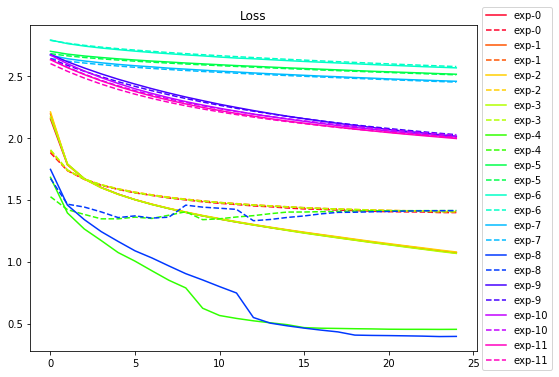

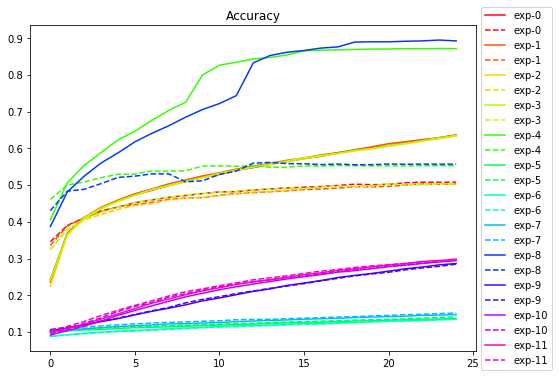

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()